برای اینکه این خط اجرا بشه باید داده ها و بسته کد پایتون در سمت چپ بارگذاری بشه

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import cv2
from dataset import load_hoda

In [3]:
X_train, y_train, X_test, y_test = load_hoda()

In [4]:
X_train.shape

(1000, 25)

ایجاد طبقه
KNN

In [5]:
neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

دهمین داده تست رو پیش بینی کن

In [6]:
X_test[10].shape

(25,)

In [7]:
neigh.predict([X_test[10]])

array([0], dtype=uint8)

In [8]:
y_test[10]

np.uint8(0)

تصویر دهمین داده تست رو بده

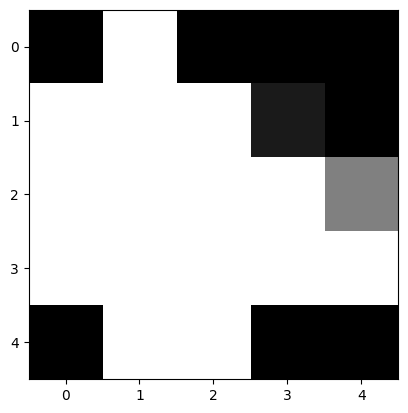

In [9]:
plt.imshow(X_test[10].reshape(5,5),cmap='gray');

لیبل داده های تست رو پیش بینی کن

In [10]:
p=neigh.predict(X_test)

In [11]:
y_test

array([7, 2, 3, 1, 5, 5, 4, 7, 3, 2, 0, 8, 8, 0, 2, 9, 3, 6, 7, 4, 0, 3,
       6, 3, 9, 2, 7, 5, 2, 9, 7, 5, 5, 8, 9, 6, 5, 1, 4, 8, 8, 4, 7, 7,
       1, 2, 7, 9, 0, 3, 7, 4, 7, 5, 2, 9, 8, 2, 9, 8, 8, 6, 6, 6, 6, 6,
       2, 4, 3, 4, 4, 5, 9, 1, 8, 2, 0, 5, 6, 2, 4, 3, 2, 7, 7, 7, 7, 1,
       8, 1, 7, 8, 7, 7, 8, 9, 3, 2, 3, 1, 0, 2, 9, 6, 3, 5, 5, 0, 0, 3,
       6, 7, 9, 3, 9, 9, 8, 7, 9, 2, 5, 2, 5, 5, 9, 6, 9, 2, 0, 3, 7, 6,
       5, 2, 9, 0, 4, 1, 8, 2, 2, 3, 0, 2, 9, 3, 8, 6, 7, 0, 9, 9, 0, 7,
       6, 5, 4, 7, 9, 3, 7, 0, 7, 1, 9, 4, 7, 3, 4, 1, 5, 6, 7, 9, 1, 3,
       5, 4, 5, 7, 4, 1, 3, 3, 1, 2, 3, 3, 8, 9, 6, 7, 7, 2, 3, 0, 1, 4,
       9, 5], dtype=uint8)

چند درصد از داده ها درست پیش بینی شدند-ارزیابی
1)استفاده از میانگین
2) استفاده از اسکور

In [12]:
np.mean(y_test==p)

np.float64(0.96)

In [13]:
neigh.score(X_test, y_test)

0.96

حالا یه عددی در پینت بنویس و اینجا بخون

In [15]:
cv2.imread('adad_8.png').shape

(180, 97, 3)

عکس عدد 8 را نشون بده

In [16]:
gray=cv2.imread('adad_8.png',cv2.IMREAD_GRAYSCALE)

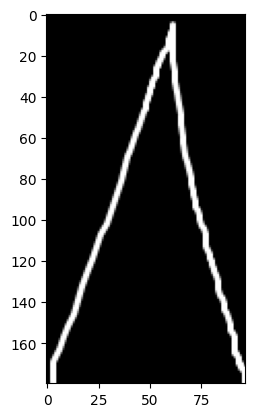

In [17]:
plt.imshow(gray,cmap='gray')

حالا عکست رو ریسایز کن:

In [18]:
resized=cv2.resize(gray,(5,5))

In [19]:
x=resized.reshape(-1,25)

In [20]:
neigh.predict(x)

array([4], dtype=uint8)

تشخیص اعدادی که در یک کاغذ نوشتم

فراخوانی تصاویر شامل اعداد

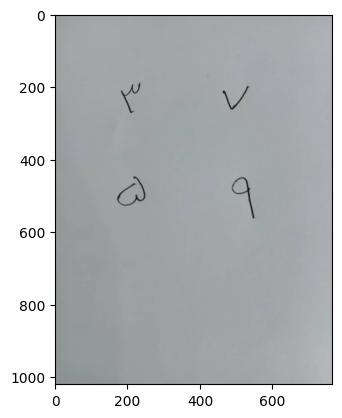

In [65]:
img=cv2.imread('/content/digits.jpg')
plt.imshow(img)

خواندن تصویر به صورت خاکستری:

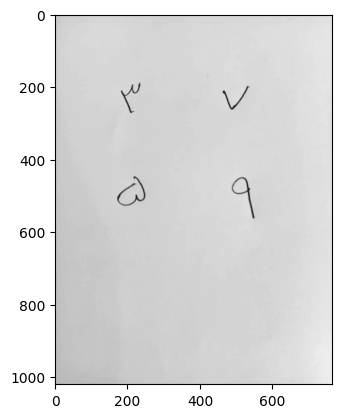

In [67]:
gray=cv2.imread('/content/digits.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(gray, cmap='gray')

کاهش تاثیر نور و پس‌زمینه

وقتی همه پیکسل‌های پس‌زمینه رو سیاه و پیکسل‌های رقم رو سفید می‌کنی، تفاوت نور و سایه یا کیفیت تصویر کمتر مشکل ایجاد می‌کنه.

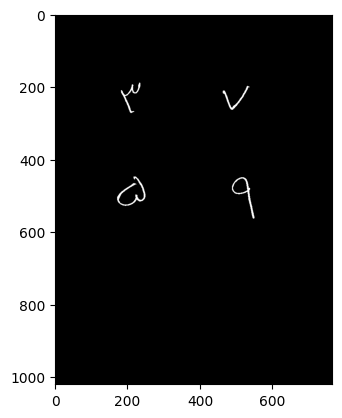

In [68]:
gray[gray>127.5]=255
gray[gray<127.5]=0
gray=255-gray
plt.imshow(gray, cmap='gray')

این خط داره از OpenCV برای شناسایی اجسام متصل (Connected Components) در تصویر استفاده می‌کنه

1-gray → تصویر خاکستری ورودی (باینری یا آستانه‌بندی شده).

2-connectivity=8 → نوع اتصال پیکسل‌ها:

In [69]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(gray, connectivity=8)

 پروسه تشخیص و نمایش عدد پیشبینی‌شده روی تصویر

3
7
8
9


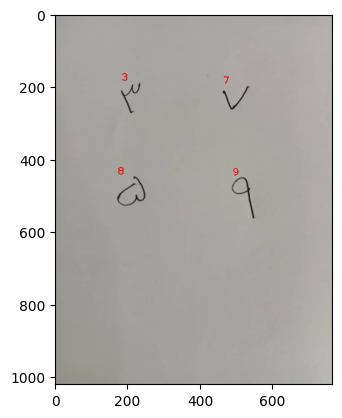

In [70]:
for i in range(1,num_labels):
  x,y,w,h=stats[i][:4]
  if w>5 and h>5:
    inp=gray[y:y+h,x:x+w]
    inp=cv2.resize(inp,(5,5))
    inp=inp.reshape(-1,25)
    r=neigh.predict(inp)[0]
    print(r)
    cv2.putText(img,str(r),(x,y-5),cv2.FONT_HERSHEY_PLAIN,2,(0,0,255),2)
plt.imshow(img[:,:,::-1])